In [1]:
# Load pacgages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set the font
plt.rcParams['font.family'] = 'Times New Roman'

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

In [2]:
# Load data
df = pd.read_csv('cyberattacks_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 81 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              298 non-null    int64  
 1   name                                            298 non-null    object 
 2   description                                     298 non-null    object 
 3   start_date                                      295 non-null    object 
 4   end_date                                        290 non-null    object 
 5   inclusion_criteria                              297 non-null    object 
 6   inclusion_criteria_subcode                      72 non-null     object 
 7   source_incident_detection_disclosure            296 non-null    object 
 8   incident_type                                   297 non-null    object 
 9   receiver_name                              

In [4]:
# Data cleaning
# Drop columns with more than 50% missing values

df = df.dropna(thresh=df.shape[0]*0.5,axis=1).reset_index(drop=True)
df.shape

(298, 39)

In [5]:
# EU countries
eu = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia','Spain','Sweden']

In [6]:
df['start_date']

0      2003-01-01
1      2004-07-01
2      2005-01-01
3      2006-01-01
4      2006-01-01
          ...    
293    2023-03-07
294    2023-03-10
295    2022-12-01
296    2023-03-01
297    2023-03-26
Name: start_date, Length: 298, dtype: object

In [7]:
# Convert the 'start_date' column to datetime format (if not already)
df['start_date'] = pd.to_datetime(df['start_date'], format='%Y-%m-%d')

# Remove rows with non-finite 'start_date' values
df = df.dropna(subset=['start_date'])

# Extract the year and convert it to an integer
df['start_year'] = df['start_date'].dt.year.astype(int)

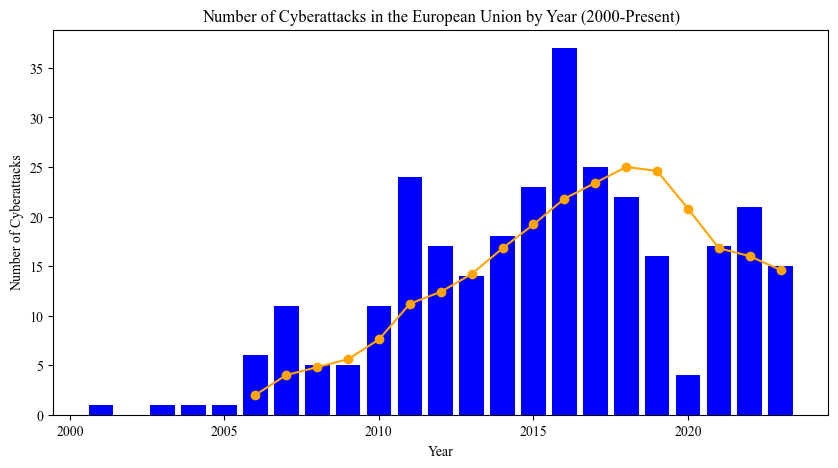

In [8]:
# Plot the number of attacks by year as bars
yearly_counts = df['start_date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index, yearly_counts.values, color='blue', label='Number of Attacks (Bars)')

# Calculate a trend line (e.g., a rolling average)
rolling_avg = yearly_counts.rolling(window=5).mean()
plt.plot(rolling_avg.index, rolling_avg.values, color='orange', linestyle='-', marker='o', label='Trend Line (Rolling Average)')

# Title and labels
plt.title('Number of Cyberattacks in the European Union by Year (2000-Present)')
plt.xlabel('Year')
plt.ylabel('Number of Cyberattacks');

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 297
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ID                                    295 non-null    int64         
 1   name                                  295 non-null    object        
 2   description                           295 non-null    object        
 3   start_date                            295 non-null    datetime64[ns]
 4   end_date                              289 non-null    object        
 5   inclusion_criteria                    295 non-null    object        
 6   source_incident_detection_disclosure  294 non-null    object        
 7   incident_type                         295 non-null    object        
 8   receiver_country                      295 non-null    object        
 9   receiver_region                       295 non-null    object        
 10  re

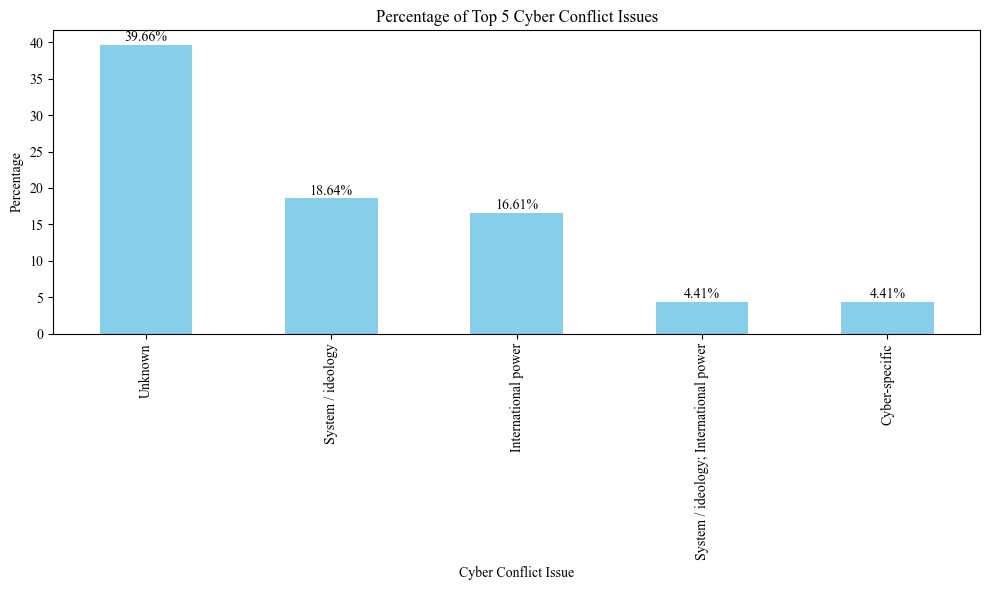

In [10]:
# Assuming your DataFrame is named df
total_entries = len(df)
issue_counts = df['cyber_conflict_issue'].value_counts()

# Take the top 6 issue categories
top_5_issues = issue_counts.head(5)

# Calculate percentages for the top 6
issue_percentages = (top_5_issues / total_entries) * 100

# Create a bar plot of percentages for the top 6
plt.figure(figsize=(10, 6))
issue_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Top 5 Cyber Conflict Issues')
plt.xlabel('Cyber Conflict Issue')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Add percentage labels on top of each bar
for i, v in enumerate(issue_percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='center', fontsize=10)
plt.tight_layout()
plt.show()

## Overview on attacks ##

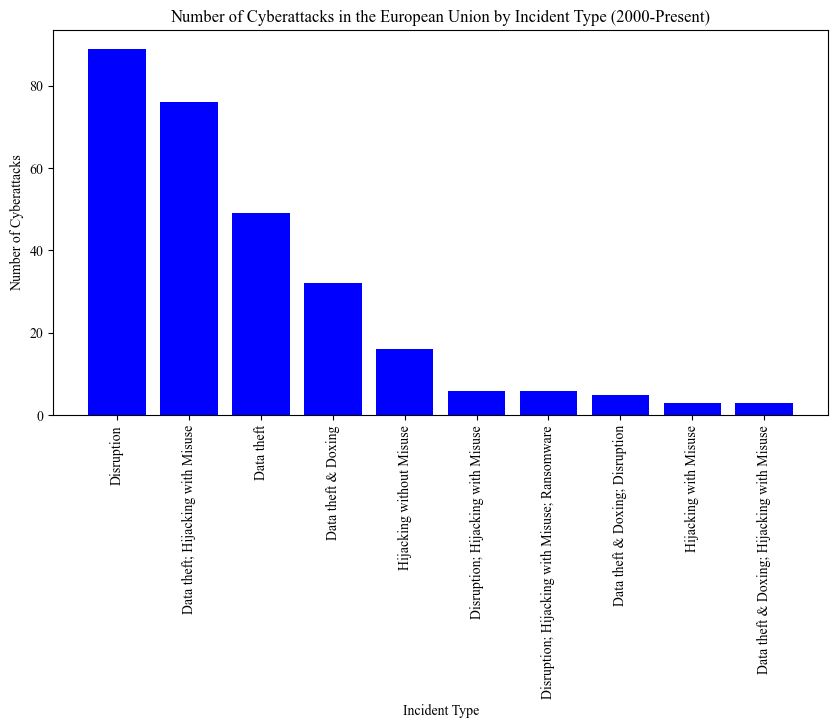

In [11]:
# Plot the indicent_type column as a bar chart

plt.figure(figsize=(10, 5))

# Get the top 10 incident types
top10_incidents = df['incident_type'].value_counts().nlargest(10)

# Plot the bar chart using the top 10 incident types
plt.bar(top10_incidents.index, top10_incidents.values, color='blue')

# Title and labels
plt.title('Number of Cyberattacks in the European Union by Incident Type (2000-Present)')
plt.xlabel('Incident Type')
plt.ylabel('Number of Cyberattacks')
plt.xticks(rotation=90);

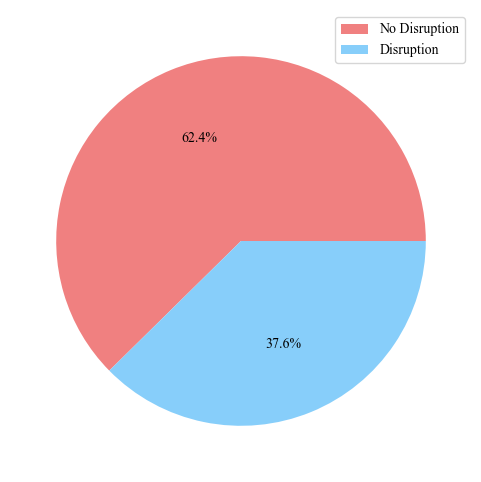

In [12]:
# Count the number of True and False values in 'has_disruption' column
disruption_counts = df['has_disruption'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(disruption_counts, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Disruption labels
plt.legend(labels=['No Disruption', 'Disruption'], loc='upper right')

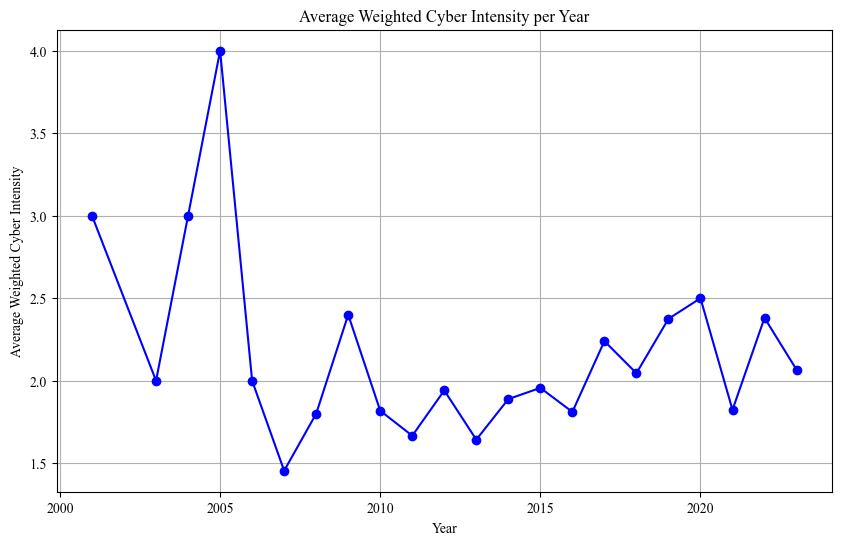

In [13]:
# Extract the year and create a new column 'Year'
df['Year'] = df['start_date'].dt.year


# Group the data by year and calculate the mean of 'weighted_cyber_intensity'
yearly_intensity = df.groupby('Year')['weighted_cyber_intensity'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_intensity.index, yearly_intensity.values, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Weighted Cyber Intensity')
plt.title('Average Weighted Cyber Intensity per Year')

# Show the plot
plt.grid(True)
plt.show()

In [14]:
# Max an Min of 'weighted_cyber_intensity'
print(df['weighted_cyber_intensity'].max())
print(df['weighted_cyber_intensity'].min())

6.0
1.0


In [15]:
# print the case of the max 'weighted_cyber_intensity'
print(df[df['weighted_cyber_intensity'] == 6.0])

       ID                                               name  \
290  2020  Ransom House Group conducted a ransomware atta...   
292  2041  Qilin ransomware group targeted elderly care f...   

                                           description start_date    end_date  \
290  According to the Catalan Cybersecurity Agency,... 2023-03-02  2023-03-05   
292  The Qilin ransomware group targeted Attent Zor... 2022-02-17  2022-02-17   

                              inclusion_criteria  \
290  Attack on critical infrastructure target(s)   
292  Attack on critical infrastructure target(s)   

    source_incident_detection_disclosure  \
290         Incident disclosed by victim   
292         Incident disclosed by victim   

                                         incident_type receiver_country  \
290      Disruption; Hijacking with Misuse; Ransomware        ['Spain']   
292  Data theft & Doxing; Disruption; Hijacking wit...  ['Netherlands']   

                          receiver_region  ... 

In [16]:
# Print all 2005 cyberattacks
print(df[df['Year'] == 2005])

   ID                         name  \
2  19  PoseidonGroup: The Boutique   

                                         description start_date    end_date  \
2  Kaspersky identified Poseidon; a Brazilian, Po... 2005-01-01  2016-01-01   

                                  inclusion_criteria  \
2  Attack on (inter alia) political target(s), no...   

        source_incident_detection_disclosure  \
2  Incident disclosed by IT-security company   

                       incident_type  \
2  Data theft; Hijacking with Misuse   

                                    receiver_country  \
2  ['United States', 'Brazil', 'France', 'Kazakhs...   

                                     receiver_region  ...  \
2  [['NATO', 'NORTHAM'], ['SOUTHAM'], ['EUROPE', ...  ...   

                                           hijacking physical_effects_spatial  \
2  Hijacking, system misuse, e.g., through data t...                     none   

  physical_effects_temporal unweighted_cyber_intensity  \
2               

## Response ##

In [17]:
# Total of NaN values in the attributed_initiator_country column
print(df['attributed_initiator_country'].isna().sum())


18


In [18]:
# Print out of the total how many of the observations have number_of_attributions                
print('Number of observations with number_of_attributions: ', df['number_of_attributions'].count())

Number of observations with number_of_attributions:  295


In [19]:
# Define the list of EU countries
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

eu_data = df.copy()  # Make a copy of the original DataFrame

# Split rows with multiple receiver countries into separate rows
eu_data['receiver_country'] = eu_data['receiver_country'].str.replace(r'\[|\]', '').str.split(', ')
eu_data = eu_data.explode('receiver_country')

# Remove extra spaces
eu_data['receiver_country'] = eu_data['receiver_country'].str.strip()

# Filter the data to include only rows where at least one EU country is present in the 'receiver_country' column
eu_data = eu_data[eu_data['receiver_country'].apply(lambda x: any(country in x for country in eu_countries))]

# Remove ' ' from the 'receiver_country' column
eu_data['receiver_country'] = eu_data['receiver_country'].str.strip().str.replace("'", '')

# Count the occurrences of each EU country in the 'receiver_country' column
eu_country_counts = eu_data['receiver_country'].value_counts()

# Display the counts
print(eu_country_counts)

Spain             69
Germany           67
Italy             42
France            42
Belgium           21
Netherlands       17
Denmark           15
Poland            15
Sweden            12
Austria           11
Bulgaria          11
Czech Republic    10
Lithuania          9
Greece             8
Finland            5
Romania            5
Slovakia           4
Hungary            4
Portugal           4
Cyprus             4
Latvia             3
Estonia            3
Ireland            2
Croatia            2
Luxembourg         2
Name: receiver_country, dtype: int64


C:\Users\Esterin\AppData\Local\Temp\ipykernel_1300\2702014311.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  eu_data['receiver_country'] = eu_data['receiver_country'].str.replace(r'\[|\]', '').str.split(', ')


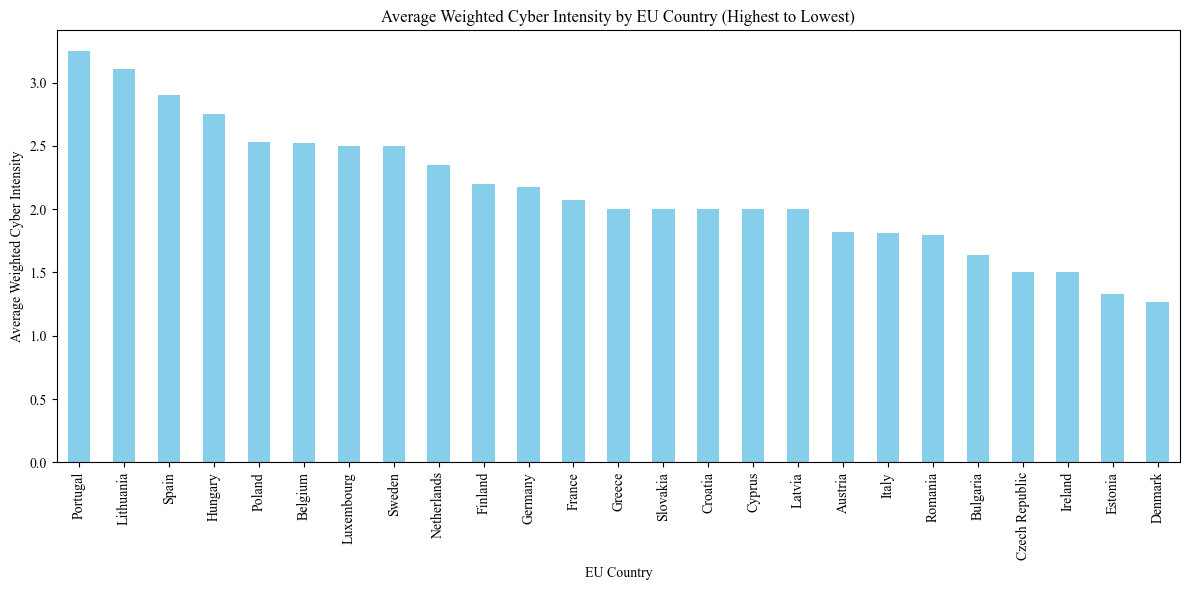

In [20]:
# Calculate the average weighted cyber intensity for each EU country
average_intensity = eu_data.groupby('receiver_country')['weighted_cyber_intensity'].mean()

# Sort the average_intensity Series in descending order
average_intensity = average_intensity.sort_values(ascending=False)

# Plot the average weighted cyber intensity as a bar chart
plt.figure(figsize=(12, 6))
average_intensity.plot(kind='bar', color='skyblue')
plt.title('Average Weighted Cyber Intensity by EU Country (Highest to Lowest)')
plt.xlabel('EU Country')
plt.ylabel('Average Weighted Cyber Intensity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [21]:
# Filter the data for pre-2018 and post-2018
df_pre_2013 = eu_data[eu_data['Year'] < 2013]
df_post_2013 = eu_data[eu_data['Year'] >= 2013]

# Calculate the average weighted cyber intensity for each EU country in both periods
average_intensity_pre_2018 = df_pre_2013.groupby('receiver_country')['weighted_cyber_intensity'].mean()
average_intensity_post_2018 = df_post_2013.groupby('receiver_country')['weighted_cyber_intensity'].mean()

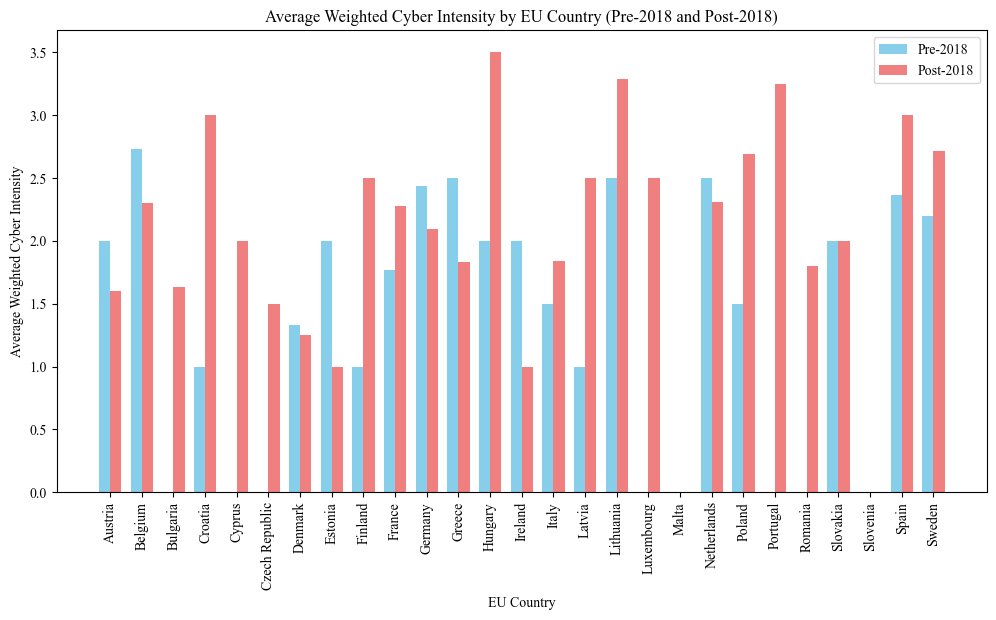

In [22]:
# Arrange the data for plotting
countries = eu_countries
pre_2018_intensity = [average_intensity_pre_2018.get(country, 0) for country in countries]
post_2018_intensity = [average_intensity_post_2018.get(country, 0) for country in countries]

# Create a bar plot
bar_width = 0.35
index = np.arange(len(countries))

plt.figure(figsize=(12, 6))
plt.bar(index, pre_2018_intensity, bar_width, label='Pre-2018', color='skyblue')
plt.bar(index + bar_width, post_2018_intensity, bar_width, label='Post-2018', color='lightcoral')

plt.xlabel('EU Country')
plt.ylabel('Average Weighted Cyber Intensity')
plt.title('Average Weighted Cyber Intensity by EU Country (Pre-2018 and Post-2018)')
plt.xticks(index + bar_width / 2, countries, rotation=90)
plt.legend()

plt.show()



In [23]:
# Which country have attributed_initiator_country as NaN?
eu_data[eu_data['attributed_initiator_country'].isna()]['receiver_country'].value_counts()

Spain          8
Denmark        8
Germany        6
Italy          5
Belgium        2
Portugal       1
Poland         1
Estonia        1
Netherlands    1
France         1
Name: receiver_country, dtype: int64

# For selected countries #

In [ ]:
eu_selected = ['Estonia', 'France', 'Germany', 'Netherlands']

C:\Users\Esterin\AppData\Local\Temp\ipykernel_1300\3209856586.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  eu_data['receiver_country'] = eu_data['receiver_country'].str.replace(r'\[|\]', '').str.split(', ')


Germany        67
France         42
Netherlands    17
Estonia         3
Name: receiver_country, dtype: int64


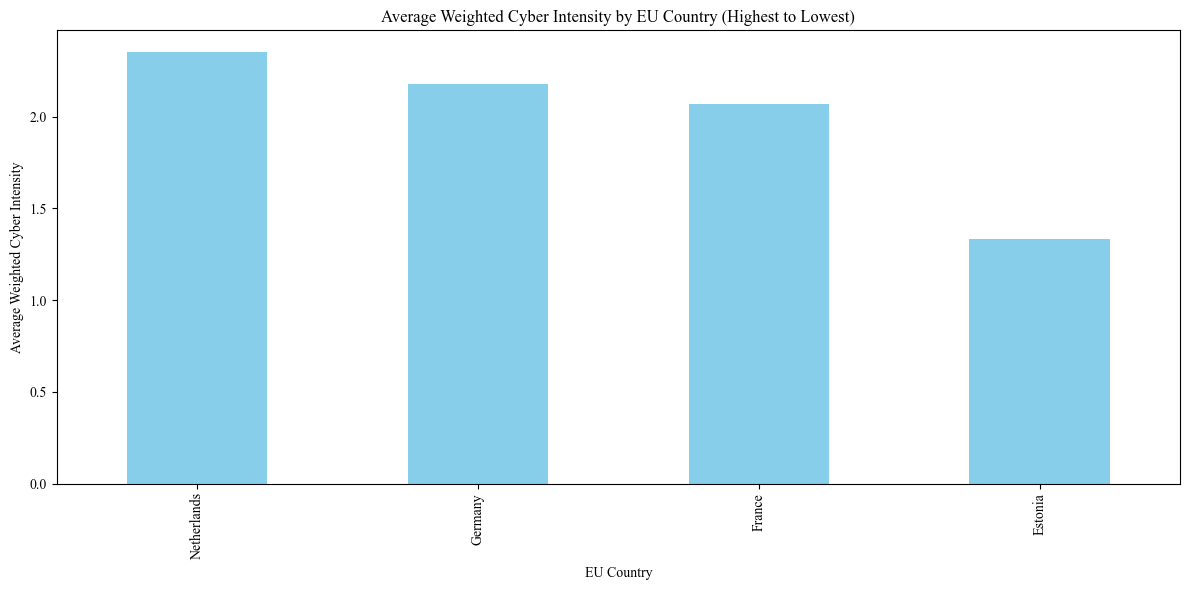

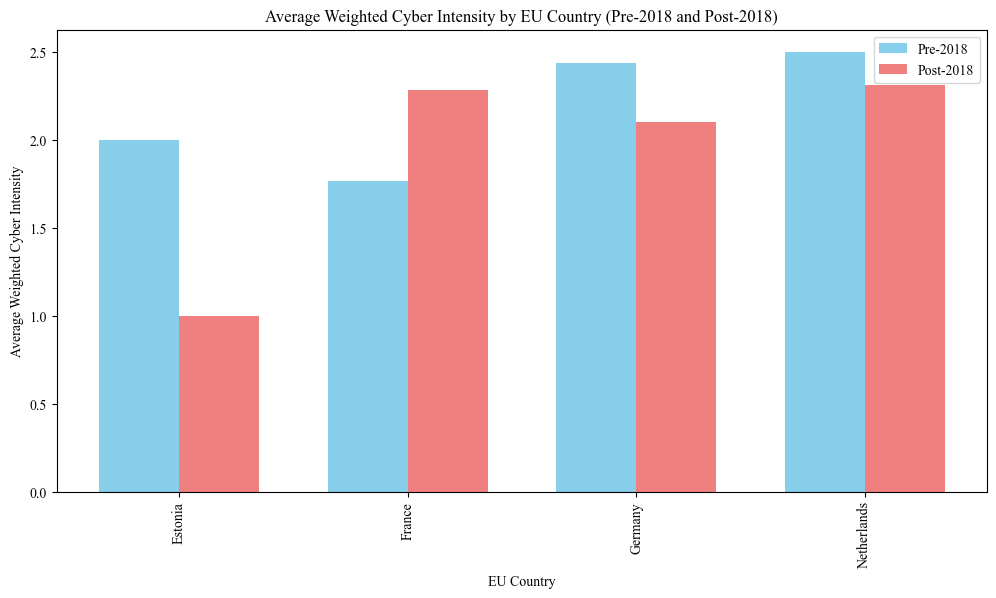

Germany        6
Estonia        1
Netherlands    1
France         1
Name: receiver_country, dtype: int64

In [25]:
# Define the list of EU countries
eu_selected = ['Estonia', 'France', 'Germany', 'Netherlands']

eu_data = df.copy()  # Make a copy of the original DataFrame

# Split rows with multiple receiver countries into separate rows
eu_data['receiver_country'] = eu_data['receiver_country'].str.replace(r'\[|\]', '').str.split(', ')
eu_data = eu_data.explode('receiver_country')

# Remove extra spaces
eu_data['receiver_country'] = eu_data['receiver_country'].str.strip()

# Filter the data to include only rows where at least one EU country is present in the 'receiver_country' column
eu_data = eu_data[eu_data['receiver_country'].apply(lambda x: any(country in x for country in eu_selected))]

# Remove ' ' from the 'receiver_country' column
eu_data['receiver_country'] = eu_data['receiver_country'].str.strip().str.replace("'", '')

# Count the occurrences of each EU country in the 'receiver_country' column
eu_country_counts = eu_data['receiver_country'].value_counts()

# Display the counts
print(eu_country_counts)

# Calculate the average weighted cyber intensity for each EU country
average_intensity = eu_data.groupby('receiver_country')['weighted_cyber_intensity'].mean()

# Sort the average_intensity Series in descending order
average_intensity = average_intensity.sort_values(ascending=False)

# Plot the average weighted cyber intensity as a bar chart
plt.figure(figsize=(12, 6))
average_intensity.plot(kind='bar', color='skyblue')
plt.title('Average Weighted Cyber Intensity by EU Country (Highest to Lowest)')
plt.xlabel('EU Country')
plt.ylabel('Average Weighted Cyber Intensity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Filter the data for pre-2018 and post-2018
df_pre_2013 = eu_data[eu_data['Year'] < 2013]
df_post_2013 = eu_data[eu_data['Year'] >= 2013]

# Calculate the average weighted cyber intensity for each EU country in both periods
average_intensity_pre_2018 = df_pre_2013.groupby('receiver_country')['weighted_cyber_intensity'].mean()
average_intensity_post_2018 = df_post_2013.groupby('receiver_country')['weighted_cyber_intensity'].mean()

# Arrange the data for plotting
countries = eu_selected
pre_2018_intensity = [average_intensity_pre_2018.get(country, 0) for country in countries]
post_2018_intensity = [average_intensity_post_2018.get(country, 0) for country in countries]

# Create a bar plot
bar_width = 0.35
index = np.arange(len(countries))

plt.figure(figsize=(12, 6))
plt.bar(index, pre_2018_intensity, bar_width, label='Pre-2018', color='skyblue')
plt.bar(index + bar_width, post_2018_intensity, bar_width, label='Post-2018', color='lightcoral')

plt.xlabel('EU Country')
plt.ylabel('Average Weighted Cyber Intensity')
plt.title('Average Weighted Cyber Intensity by EU Country (Pre-2018 and Post-2018)')
plt.xticks(index + bar_width / 2, countries, rotation=90)
plt.legend()

plt.show()

# Which country have attributed_initiator_country as NaN out of the total?
eu_data[eu_data['attributed_initiator_country'].isna()]['receiver_country'].value_counts()

In [31]:
# Print Estonia cyberattacks
print(eu_data[eu_data['receiver_country'] == 'Estonia'])

       ID                                               name  \
15     56                                       Estonia 2007   
94    535                      Anonymous Ukraine vs. Estonia   
288  1902  Unknown actors temporarily disrupted access to...   

                                           description start_date    end_date  \
15   Different targets in Estonia attacked on the b... 2007-04-27  2007-05-01   
94   The official website of Estonia’s Ministry of ... 2013-11-01  2013-11-01   
288  Unknown actors disrupted access to the website... 2023-01-19  2023-01-20   

                                    inclusion_criteria  \
15   Attack conducted by non-state group / non-stat...   
94   Attack conducted by non-state group / non-stat...   
288  Attack on (inter alia) political target(s), no...   

                  source_incident_detection_disclosure incident_type  \
15   Incident disclosed by media (without further i...    Disruption   
94                      Incident disclose